In [34]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(columns=['Saida','Tempo','n','Algoritmo'])

lista_program = ['./main','./random_local_search/main']
lista_programs=[]
for i in lista_program:
        lista_=[]
        for j in range(1,197):
            f = open(f'inputs_generator/in{j}.txt',"r")
            contents = f.read()
            f.close()
            n = contents.split()[0]
            m = contents.split()[1]
            start = time.perf_counter()
            proc = subprocess.run([i], input=contents, text=True, capture_output=True)
            end = time.perf_counter()
#             print('Saída:', proc.stdout)
            print("value", proc.stdout.split()[-1])
            print('Stderr:', proc.stderr)
            print('Tempo total(s):', end - start)
            dic = {
                'Tempo':float(end-start),
                'Saida':int(proc.stdout.split()[-1]),
                'n': int(n),
                'm': int(m)
            }
            lista_.append(dic)
        lista_programs.append(lista_)

value 6
Stderr: 
Tempo total(s): 0.01069005000317702
value 6
Stderr: 
Tempo total(s): 0.009563455998431891
value 2
Stderr: 
Tempo total(s): 0.011083022000093479
value 6
Stderr: 
Tempo total(s): 0.009683776996098459
value 8
Stderr: 
Tempo total(s): 0.010482220000994857
value 7
Stderr: 
Tempo total(s): 0.009452060003241058
value 8
Stderr: 
Tempo total(s): 0.009225564004736952
value 9
Stderr: 
Tempo total(s): 0.009322286998212803
value 10
Stderr: 
Tempo total(s): 0.009695038002973888
value 11
Stderr: 
Tempo total(s): 0.00922140200418653
value 11
Stderr: 
Tempo total(s): 0.010151293005037587
value 16
Stderr: 
Tempo total(s): 0.00952959799906239
value 14
Stderr: 
Tempo total(s): 0.00986391900369199
value 13
Stderr: 
Tempo total(s): 0.010265663993777707
value 13
Stderr: 
Tempo total(s): 0.009667719001299702
value 16
Stderr: 
Tempo total(s): 0.009908967003866564
value 16
Stderr: 
Tempo total(s): 0.009517592996417079
value 12
Stderr: 
Tempo total(s): 0.009355642003356479
value 19
Stderr: 
Temp

value 110
Stderr: 
Tempo total(s): 0.02416066599835176
value 106
Stderr: 
Tempo total(s): 0.018744070002867375
value 111
Stderr: 
Tempo total(s): 0.020003552999696694
value 106
Stderr: 
Tempo total(s): 0.015534115002083126
value 108
Stderr: 
Tempo total(s): 0.020166611997410655
value 111
Stderr: 
Tempo total(s): 0.020927399993524887
value 111
Stderr: 
Tempo total(s): 0.01833871300186729
value 98
Stderr: 
Tempo total(s): 0.011531784999533556
value 114
Stderr: 
Tempo total(s): 0.015201089001493528
value 110
Stderr: 
Tempo total(s): 0.020161857995844912
value 121
Stderr: 
Tempo total(s): 0.01969635700515937
value 110
Stderr: 
Tempo total(s): 0.018115767001290806
value 116
Stderr: 
Tempo total(s): 0.014402237000467721
value 102
Stderr: 
Tempo total(s): 0.01455450800131075
value 113
Stderr: 
Tempo total(s): 0.021432804001960903
value 111
Stderr: 
Tempo total(s): 0.021622517000650987
value 113
Stderr: 
Tempo total(s): 0.014370280005095992
value 118
Stderr: 
Tempo total(s): 0.0168312180030625

value -13
Stderr: 
Tempo total(s): 0.008857665001414716
value -13
Stderr: 
Tempo total(s): 0.009255734003090765
value -13
Stderr: 
Tempo total(s): 0.010329935001209378
value -13
Stderr: 
Tempo total(s): 0.010481131001142785
value -1
Stderr: 
Tempo total(s): 0.008863974995620083
value 1
Stderr: 
Tempo total(s): 0.009196009996230714
value 2
Stderr: 
Tempo total(s): 0.009755412000231445
value -13
Stderr: 
Tempo total(s): 0.008908542004064657
value 5
Stderr: 
Tempo total(s): 0.008779673000390176
value -13
Stderr: 
Tempo total(s): 0.01030672400520416
value -13
Stderr: 
Tempo total(s): 0.009881717996904626
value 4
Stderr: 
Tempo total(s): 0.00923372599936556
value -13
Stderr: 
Tempo total(s): 0.010189301996433642
value 5
Stderr: 
Tempo total(s): 0.010430448004626669
value -13
Stderr: 
Tempo total(s): 0.009125930999289267
value -13
Stderr: 
Tempo total(s): 0.009886182000627741
value -13
Stderr: 
Tempo total(s): 0.010284506999596488
value -13
Stderr: 
Tempo total(s): 0.010818814000231214
value

In [35]:
for i in range(len(lista_programs)):
    for j in lista_programs[i]:
        if i == 0:
            alg = 'Smith'
        else:
            alg = 'Random Search'
        j['Algoritmo'] = alg
        df = df.append(j, ignore_index = True);

/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(j, ignore_index = True);
/tmp/ipykernel_45094/3590006343.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [36]:
df

,Saida,Tempo,n,Algoritmo,m
0,6,0.01069,4,Smith,9.0
1,6,0.009563,5,Smith,18.0
2,2,0.011083,6,Smith,11.0
3,6,0.009684,7,Smith,7.0
4,8,0.010482,8,Smith,40.0
...,...,...,...,...,...
387,-13,0.010693,195,Random Search,811.0
388,-13,0.010326,196,Random Search,556.0
389,8,0.011539,197,Random Search,845.0
390,-3,0.009423,198,Random Search,513.0


/home/marcelo/.local/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


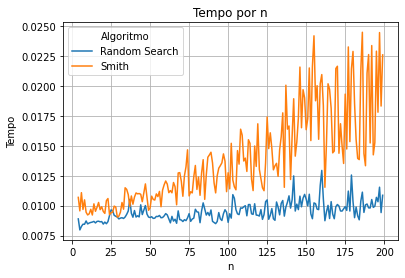

In [40]:
df.pivot(index='n',columns='Algoritmo',values='Tempo').plot()
plt.title("Tempo por n");
plt.ylabel("Tempo");
plt.grid();

/home/marcelo/.local/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


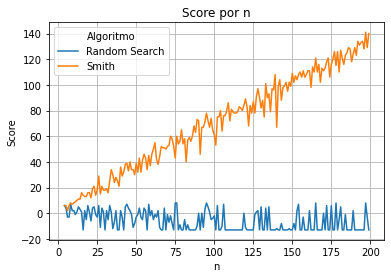

In [38]:
df.pivot(index='n',columns='Algoritmo',values='Saida').plot()
plt.title("Score por n");
plt.grid()
plt.ylabel("Score");